In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from datetime import datetime as dt
import statistics

In [2]:
apikey="APIKEY"

In [3]:
url="https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=30"

In [4]:
response = requests.get(url, headers={'authorization': 'Apikey{apikey}'})

In [5]:
r = response.json()

In [6]:
print(r)

{'Response': 'Success', 'Message': '', 'HasWarning': False, 'Type': 100, 'RateLimit': {}, 'Data': {'Aggregated': False, 'TimeFrom': 1644019200, 'TimeTo': 1646611200, 'Data': [{'time': 1644019200, 'high': 41954.24, 'low': 40963.47, 'open': 41590.34, 'volumefrom': 22244.16, 'volumeto': 923755180.09, 'close': 41418.21, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1644105600, 'high': 42671.81, 'low': 41152.05, 'open': 41418.21, 'volumefrom': 14391.14, 'volumeto': 600848486.11, 'close': 42412.41, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1644192000, 'high': 44518.11, 'low': 41689.77, 'open': 42412.41, 'volumefrom': 42425.21, 'volumeto': 1836978530.57, 'close': 43861.07, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1644278400, 'high': 45483.65, 'low': 42704.39, 'open': 43861.07, 'volumefrom': 44964.2, 'volumeto': 1972336800.82, 'close': 44080.12, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1644364800, 'high': 44849.9, 'l

In [7]:
r = r["Data"]["Data"]

In [8]:
df = pd.DataFrame(r)

In [9]:
df.head(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1644019200,41954.24,40963.47,41590.34,22244.16,9.237552e+08,41418.21,direct,
1,1644105600,42671.81,41152.05,41418.21,14391.14,6.008485e+08,42412.41,direct,
2,1644192000,44518.11,41689.77,42412.41,42425.21,1.836979e+09,43861.07,direct,
3,1644278400,45483.65,42704.39,43861.07,44964.20,1.972337e+09,44080.12,direct,
4,1644364800,44849.90,43167.21,44080.12,27461.26,1.207982e+09,44422.91,direct,
5,1644451200,45837.02,43254.41,44422.91,45532.09,2.027453e+09,43531.67,direct,
6,1644537600,43950.88,42010.61,43531.67,39322.02,1.694547e+09,42398.98,direct,
7,1644624000,43041.72,41775.79,42398.98,17662.13,7.474808e+08,42239.01,direct,
8,1644710400,42773.35,41900.31,42239.01,12420.62,5.257792e+08,42069.84,direct,
9,1644796800,42857.15,41581.41,42069.84,27975.80,1.183004e+09,42552.28,direct,


In [10]:
df=df.iloc[:,:7]

In [11]:
df.head()

,time,high,low,open,volumefrom,volumeto,close
0,1644019200,41954.24,40963.47,41590.34,22244.16,9.237552e+08,41418.21
1,1644105600,42671.81,41152.05,41418.21,14391.14,6.008485e+08,42412.41
2,1644192000,44518.11,41689.77,42412.41,42425.21,1.836979e+09,43861.07
3,1644278400,45483.65,42704.39,43861.07,44964.20,1.972337e+09,44080.12
4,1644364800,44849.90,43167.21,44080.12,27461.26,1.207982e+09,44422.91


In [12]:
df["daily_returns"] = df["close"]-df["open"]

In [13]:
df.head()

,time,high,low,open,volumefrom,volumeto,close,daily_returns
0,1644019200,41954.24,40963.47,41590.34,22244.16,9.237552e+08,41418.21,-172.13
1,1644105600,42671.81,41152.05,41418.21,14391.14,6.008485e+08,42412.41,994.20
2,1644192000,44518.11,41689.77,42412.41,42425.21,1.836979e+09,43861.07,1448.66
3,1644278400,45483.65,42704.39,43861.07,44964.20,1.972337e+09,44080.12,219.05
4,1644364800,44849.90,43167.21,44080.12,27461.26,1.207982e+09,44422.91,342.79


In [14]:
total_returns = df["daily_returns"].sum()
print(total_returns)

-3332.019999999997


In [15]:
#Now we caluclate returns for ETH#

In [16]:
url2="https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=30"

In [17]:
response2 = requests.get(url2, headers={'authorization': 'Apikey{apikey}'})

In [18]:
r2 = response2.json()

In [19]:
r2 = r2["Data"]["Data"]

In [20]:
df2 = pd.DataFrame(r2)

In [21]:
df2.head(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1644019200,3062.95,2962.22,2997.18,255479.72,7.692118e+08,3015.26,direct,
1,1644105600,3075.45,2952.80,3015.26,133595.11,4.020350e+08,3057.68,direct,
2,1644192000,3192.50,2996.04,3057.68,372171.22,1.158531e+09,3141.38,direct,
3,1644278400,3233.58,3028.60,3141.38,360771.09,1.122580e+09,3118.76,direct,
4,1644364800,3273.04,3057.51,3118.76,291438.28,9.246639e+08,3246.72,direct,
5,1644451200,3283.28,3059.58,3246.72,400824.47,1.273705e+09,3074.84,direct,
6,1644537600,3139.99,2880.24,3074.84,446120.24,1.349462e+09,2928.93,direct,
7,1644624000,2986.55,2859.52,2928.93,218079.80,6.364926e+08,2918.34,direct,
8,1644710400,2954.60,2839.03,2918.34,162466.43,4.712447e+08,2872.44,direct,
9,1644796800,2965.85,2832.37,2872.44,310054.68,9.007495e+08,2931.12,direct,


In [22]:
df2=df2.iloc[:,:7]

In [23]:
df2["daily_returns"] = df2["close"]-df2["open"]

In [24]:
df2.head()

,time,high,low,open,volumefrom,volumeto,close,daily_returns
0,1644019200,3062.95,2962.22,2997.18,255479.72,7.692118e+08,3015.26,18.08
1,1644105600,3075.45,2952.80,3015.26,133595.11,4.020350e+08,3057.68,42.42
2,1644192000,3192.50,2996.04,3057.68,372171.22,1.158531e+09,3141.38,83.70
3,1644278400,3233.58,3028.60,3141.38,360771.09,1.122580e+09,3118.76,-22.62
4,1644364800,3273.04,3057.51,3118.76,291438.28,9.246639e+08,3246.72,127.96


In [25]:
total_returns2 = df2["daily_returns"].sum()
print(total_returns2)

-458.1999999999998


In [26]:
returns_btc = df.iloc[:,-1]

In [27]:
return_eth = df2.iloc[:,-1]

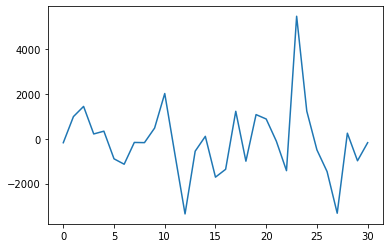

In [28]:
p = plt.plot(returns_btc.index, returns_btc.values)

<BarContainer object of 31 artists>

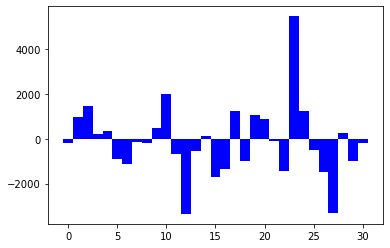

In [29]:
x = range(31)
ax = plt.subplot(111)
ax.bar(x, returns_btc, width=1, color='b')

In [30]:
statistics.mean(returns_btc)

-107.48451612903216

In [31]:
statistics.median(returns_btc)

-169.17000000000553

In [32]:
statistics.stdev(returns_btc)

1618.7842360628524

In [33]:
#####

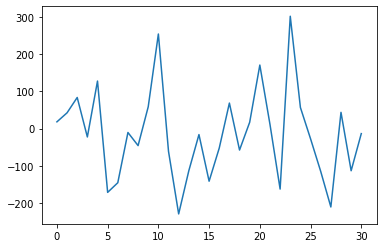

In [34]:
p = plt.plot(return_eth.index, return_eth.values)

<BarContainer object of 31 artists>

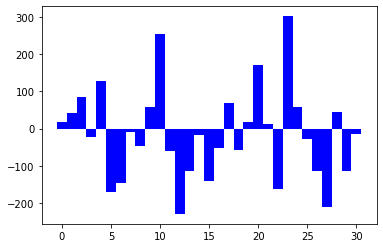

In [35]:
x = range(31)
ax = plt.subplot(111)
ax.bar(x, return_eth, width=1, color='b')

In [36]:
statistics.mean(return_eth)

-14.780645161290316

In [37]:
statistics.median(return_eth)

-16.2199999999998

In [38]:
statistics.stdev(return_eth)

124.63486232285311